# 設定とか諸々

In [ ]:
### 初回のみ実行
!pip install japanize-matplotlib
!pip install numexpr

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline
import requests
import json
import time
import random

In [ ]:
def setNext_url(url, page):
  return f'{url}&page={page}'

# DF読み込み

In [ ]:
df = pd.read_csv('./movies_df/movies.csv', engine='python')
genre_df = pd.read_csv('./movies_df/genres.csv')
df.head(10)

,id,title,popularity,date,vote_count,vote_average,overview,poster_path
0,761053,Gabriel's Inferno Part III,36.282,2020-11-19,698.0,8.9,NaN,/fYtHxTxlhzD4QWfEbrC1rypysSD.jpg
1,724089,Gabriel's Inferno Part II,8.849,2020-07-31,1161.0,8.8,NaN,/pci1ArYW7oJ2eyTo2NMYEKHHiCP.jpg
2,19404,シャー・ルク・カーンのDDLJ／ラブゲット大作戦,15.261,1995-10-20,2638.0,8.8,シムランは22年前に一家でロンドンに移住してきたインド人の女の子。ある日、父のバルデーウ宛に...,/4Box84D6a7Mfa6ZMmC1B246GBQq.jpg
3,696374,Gabriel's Inferno,13.298,2020-05-29,1922.0,8.7,NaN,/oyG9TL7FcRP4EZ9Vid6uKzwdndz.jpg
4,278,ショーシャンクの空に,51.057,1994-09-23,18280.0,8.7,妻とその愛人を射殺したかどでショーシャンク刑務所送りとなった銀行家アンディ。初めは戸惑ってい...,/5NyJbE7JVfDJtP7c4CQzxgCLHFY.jpg
5,238,ゴッドファーザー,48.127,1972-03-14,13811.0,8.7,シシリーからアメリカに移住し、一代で財を成したドン・コルレオーネ。三男のマイケルはひとり堅気...,/mLu2p6affykeVfe9uWFAppiRQUk.jpg
6,424,シンドラーのリスト,28.874,1993-11-30,11006.0,8.6,1939年、ポーランド南部の都市クラクフにドイツ軍が侵攻した。ドイツ人実業家のオスカー・シン...,/sF1U4EUQS8YHUYjNl3pMGNIQyr0.jpg
7,372058,君の名は。,113.205,2016-08-26,7093.0,8.6,"1,000年に1度のすい星来訪が、1か月後に迫る日本。山々に囲まれた田舎町に住む女子高生の三...",/iaiy3tg9QVkDpObm1IGqmbC9A5C.jpg
8,240,ゴッドファーザー PART II,33.548,1974-12-20,8242.0,8.6,亡き父のあとを継ぎドンとなったマイケルの苦悩と復讐を、父ビトーの少年時代からやがて一大ファミ...,/hqsTp0ysGUU4RsRDlJUz9LhykHJ.jpg
9,129,千と千尋の神隠し,73.818,2001-07-20,10912.0,8.5,両親と共に引越し先の新しい家へ向かう10歳の少女、千尋。しかし彼女はこれから始まる新しい生活...,/8TEs6twIANAc2qiU8m17JO8Ujcx.jpg


# dfの分析

In [ ]:
df.query(' 8.0 < vote_average ').sample(n=10)

,id,title,popularity,date,vote_count,vote_average,overview,poster_path
62,157336,インターステラー,104.527,2014-11-05,25048,8.3,近未来の地球では植物の枯死、異常気象により人類は滅亡の危機に立たされていた。元宇宙飛行士クー...,/rgoNKrN5oEWIpfM6ZSPORbB2NYf.jpg
66,101,レオン,46.768,1994-09-14,10498,8.3,リュック・ベッソンが初めてアメリカで製作したバイオレンス・アクション。ニューヨークを舞台に、...,/82MD4KTzz0dVNYx9Mpu48ALA0ll.jpg
184,9702,Bound by Honor,39.344,1993-02-05,693,8.1,,/gvP6R6juhe2IpCG7QGDgjyUvm0g.jpg
185,310569,Que Horas Ela Volta?,7.483,2015-02-08,502,8.1,,/bxyeCyzS8gARxC7fhCX2dlG3Qgm.jpg
177,667520,泣きたい私は猫をかぶる,68.489,2020-06-18,674,8.1,笹木美代（ささき・みよ）は、いつも明るく陽気な中学二年生の女の子。空気を読まない言動で周囲を...,/75hyeJQwa6Q4CDF4g99GYq2WVLK.jpg
23,769,グッドフェローズ,33.880,1990-09-12,8555,8.4,ヘンリー・ヒル、1943年ブルックリン生まれ。大物ギャング、ポーリーのアジトで育った彼は、物...,/vRjF27uwXOu71tzCFOvvCScX9VI.jpg
37,4935,ハウルの動く城,45.281,2004-11-19,6083,8.4,父親の帽子店で帽子を作って暮らしていた18歳のソフィーは、荒野の魔女の呪いで90歳の老婆の姿...,/kt2lodzyp1DMCSuH5UUw8nGzfh9.jpg
81,797,仮面/ペルソナ,17.406,1966-10-18,1273,8.3,,/bjPo1GDN1DaXcg8ecSzwLTLdbbv.jpg
115,705,イヴの総て,17.286,1950-10-06,998,8.2,ある日、新進女優イヴ・ハリントンはアメリカ演劇界の栄えある賞に輝いた。だが、彼女がここまで上...,/rqXgpuOOnO0vxw1EHDA3DssNMgA.jpg
13,680,パルプ・フィクション,46.459,1994-09-10,20536,8.5,強盗の計画を立てているカップルを導入部に、盗まれたトランクを取り戻そうとする二人組のギャング...,/zfbioY0VoORe1hBveFNX8wzyrf9.jpg


In [ ]:
len(df)

5471

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            5463 non-null   int64  
 1   title         5463 non-null   object 
 2   popularity    5463 non-null   float64
 3   date          5463 non-null   object 
 4   vote_count    5463 non-null   int64  
 5   vote_average  5463 non-null   float64
 6   overview      5463 non-null   object 
 7   poster_path   5463 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 341.6+ KB


In [ ]:
df.describe()

,id,popularity,vote_count,vote_average
count,5463.000000,5463.000000,5463.000000,5463.000000
mean,125471.233205,29.242878,2138.465495,6.672890
std,172376.876994,53.929998,2820.188624,0.808613
min,5.000000,0.600000,400.000000,2.800000
25%,8487.500000,15.305000,618.000000,6.100000
50%,16642.000000,19.737000,1048.000000,6.700000
75%,242735.500000,28.880000,2374.500000,7.300000
max,775996.000000,2253.729000,28399.000000,8.900000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa856b1160>,
      dtype=object)

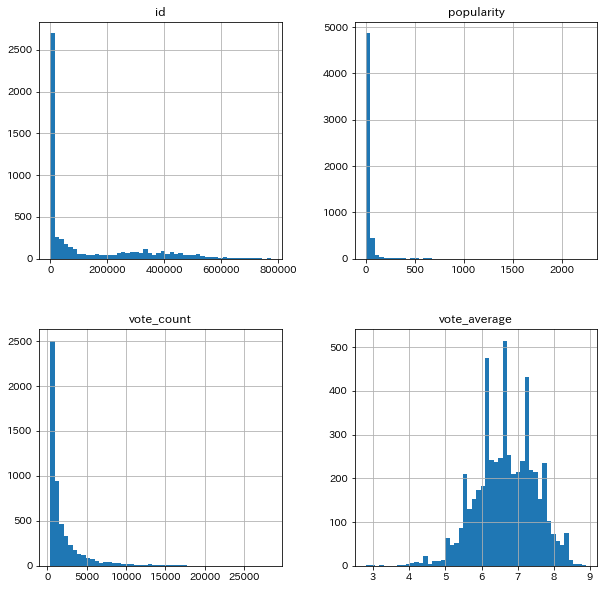

In [ ]:
df.hist(bins=50, figsize=(10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faa852a7358>,
      dtype=object)

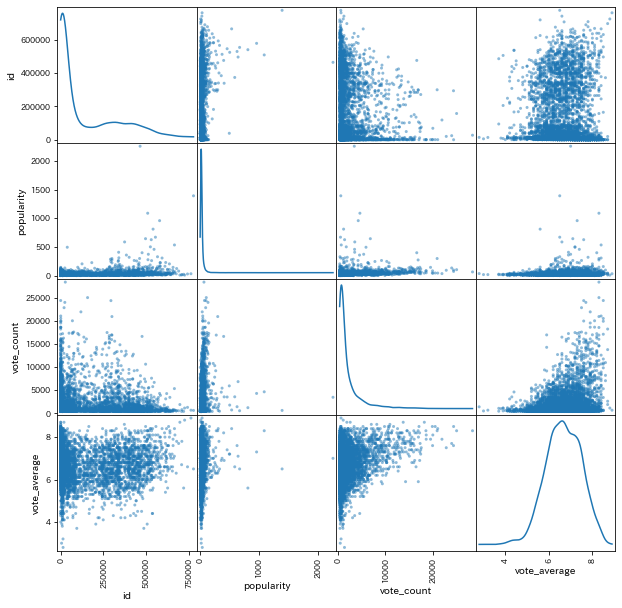

In [ ]:
pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(10, 10))

# genre_dfの分析

In [ ]:
genre_df.head(10)

,id,genre
0,761053,10749
1,761053,35
2,724089,10749
3,19404,35
4,19404,18
5,19404,10749
6,696374,10749
7,278,18
8,278,80
9,238,18


In [ ]:
genre_df.shape

(14526, 2)

In [ ]:
genre_df.describe()

,id,genre
count,14526.000000,14526.000000
mean,123203.500620,1822.479347
std,172315.181019,3895.219661
min,5.000000,12.000000
25%,8394.250000,18.000000
50%,15121.000000,35.000000
75%,238615.000000,80.000000
max,775996.000000,10770.000000


<BarContainer object of 19 artists>

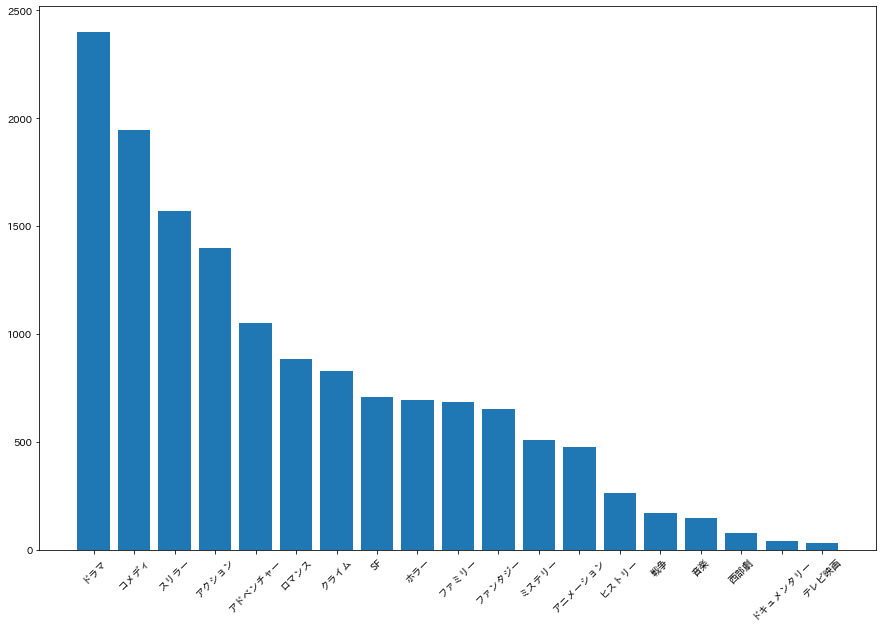

In [ ]:
genre_dict = {'28': 'アクション', '12': 'アドベンチャー', '16': 'アニメーション', '35': 'コメディ', '80': 'クライム',
              '99': 'ドキュメンタリー', '18': 'ドラマ', '10751': 'ファミリー', '14': 'ファンタジー',
              '36': 'ヒストリー', '27': 'ホラー', '10402': '音楽', '9648': 'ミステリー',
              '10749': 'ロマンス', '878': 'SF', '10770': 'テレビ映画', '53': 'スリラー',
              '10752': '戦争', '37': '西部劇'
}

freq = genre_df['genre'].astype(str).replace(genre_dict).value_counts()
freq_index = list(freq.index)
freq_count = list(freq)

plt.figure(figsize=(15,10))
plt.xticks(rotation=45)
plt.bar(freq_index, freq_count)

# 各映画のレビューDF作成

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.query(' date < "2020-05-01" ').reset_index(drop=True)[40:50]

,id,title,popularity,date,vote_count,vote_average,overview,poster_path
40,3782,生きる,12.555,1952-10-09,629.0,8.4,市役所の市民課長・渡辺勘治は30年間無欠勤のまじめな男。ある日、渡辺は自分が胃癌であることを...,/uMaLKmpxepW4Uq8lcCpels656u0.jpg
41,423,戦場のピアニスト,23.614,2002-09-17,6065.0,8.4,ナチスのワルシャワ侵攻を目の当たりにし、死の収容所送りを奇跡的に逃れたシュピルマンは、ゲット...,/3DzePKMbLMIM636S6syCy3cLPqj.jpg
42,901,街の灯,12.987,1931-02-01,1355.0,8.4,世の中は極端に不景気。小男で風彩もあがらず、服装もみすぼらしく、職もなく住むところもないチャ...,/bXNvzjULc9jrOVhGfjcc64uKZmZ.jpg
43,567,裏窓,18.756,1954-09-01,4271.0,8.4,カメラマンのジェフは足を骨折し、ニューヨークはグリニッチ・ヴィレッジのアパートで療養中。身動...,/v1bKkjiZO0DamWqAGh2fLZYfFuQ.jpg
44,527641,Five Feet Apart,77.845,2019-03-15,3949.0,8.4,NaN,/kreTuJBkUjVWePRfhHZuYfhNE1T.jpg
45,18491,新世紀エヴァンゲリオン劇場版 Air／まごころを、君に - THE END OF EVANG...,30.491,1997-07-19,706.0,8.4,第25話「Air」 全ての使徒を倒したNERVに対し、サードインパクト発動を目論むゼーレが戦...,/vIWonMqeYRmY95OEk06NvTC1h8N.jpg
46,128,もののけ姫,34.630,1997-07-12,5390.0,8.3,山里に住む若者アシタカは、怒りと憎しみにより“タタリ神”と化した猪神から呪いをかけられてしま...,/k4HOqXsHwQBZslSCu2WSWLD2zgk.jpg
47,120,ロード・オブ・ザ・リング,86.224,2001-12-18,18608.0,8.3,はるか昔。闇の冥王サウロンは世界を滅ぼす魔力を秘めたひとつの指輪を作り出した。指輪の力に支配...,/3Y6AjrxjsQiQNcqjprQQc3CCQRn.jpg
48,975,突撃,12.965,1957-09-18,1787.0,8.3,第一次世界大戦、フランスの最大の課題はドイツ軍の撃退だった。そんな中、ダックス大佐はドイツ軍...,/Ad6WhONWzYruWk9mm6JZF2oZBwl.jpg
49,27205,インセプション,61.875,2010-07-15,28424.0,8.3,他人の夢に潜入してアイデアを盗み出す企業スパイのコブは国際指名手配犯であるが、それと同時に妻...,/qzb0slJerd5bQgJxteJ5oAmfp09.jpg


In [ ]:
from bs4 import BeautifulSoup
import requests
import re

### 映画No.
number = 43

# 最新すぎる映画は、Flimarksにない可能性が高いため弾く
old_review_df = df.query(' date < "2020-05-01" ').reset_index(drop=True)
title_list = list(old_review_df['title'])
id_list = list(old_review_df['id'])
date_list = list(old_review_df['date'])

title = title_list[number]
tmdb_id = id_list[number]
year = str(date_list[number])[:4]

### 全角を半角にするテーブル
trans_table = str.maketrans({'１': '1', '２': '2', '３': '3', '４': '4', '５': '5',
                             '６': '6', '７': '7', '８': '8', '９': '9', '０': '0',
                             '　': ' '})
title = title.translate(trans_table)

print(f'number: {number},\ttitle: {title},\tyear: {year}')

# トップページからtitleで検索するurl
base_url = f'https://filmarks.com/search/movies?q={title}'

r = requests.get(base_url)
soup = BeautifulSoup(r.text, 'lxml')

# moviesを取得
contents = soup.body.find_all('div', class_='p-content-cassette__info')
img_alt = ''
movies_sim = []

# titleに合うmovieのidを検索
for i, content in enumerate(contents):
  img_alt = content.find('img').get('alt')
  other_info = content.find('div', class_='p-content-cassette__other-info')
  pub_date = other_info.find('h4', class_='p-content-cassette__other-info__title').get_text()
  if '上映日' in pub_date:
    date_year = other_info.find('span').get_text()[:4]
  else:
    date_year = '記載なし'
  point = 0.0
  if title.replace(' ', '') == img_alt.translate(trans_table).replace(' ', ''):
    point += 1.2
  if title.replace(' ', '') in img_alt.translate(trans_table).replace(' ', ''):
    point += 1.0
    if date_year != '記載なし':
      if year == date_year:
        point += 0.8
      elif abs(int(year) - int(date_year)) <= 1:
        point += 0.6
      elif abs(int(year) - int(date_year)) <= 3:
        point += 0.4
  print(f'i={i},\timg_alt: {img_alt},\tdate_year: {date_year},\tpoint: {point}')
  movies_sim.append(point)

### 最大ポイントが複数ある場合、制作年を参照する
index_list = [i for i, v in enumerate(movies_sim) if v == max(movies_sim)]
if 1< len(index_list):
  for ind in index_list:
    mv_data_clip = soup.body.find_all('div', class_='p-content-cassette')[ind].get('data-clip')
    mv_id = re.search('"movie_id":[0-9]+', mv_data_clip).group().split(':')[1]
    mv_url = f'https://filmarks.com/movies/{mv_id}'
    req = requests.get(mv_url)
    sp = BeautifulSoup(req.text, 'lxml')
    product_year = sp.find('h2', class_='p-content-detail__title').small.find('a').get_text()
    if year in product_year:
      index = ind
      break
    time.sleep(2)
else:
  index = index_list[0]
img_alt = contents[index].find('img').get('alt')

movie_data_clip = soup.body.find_all('div', class_='p-content-cassette')[index].get('data-clip')
movie_id = re.search('"movie_id":[0-9]+', movie_data_clip).group().split(':')[1]
filmarks_id = movie_id

print('')
print(f'img_alt: {img_alt}')
print(f'movie_data_clip: {movie_data_clip}')
print(f'movie_id: {movie_id}')
print(f'tmdb_id: {tmdb_id}, filmarks_id: {filmarks_id}')

number: 43,	title: 裏窓,	year: 1954
i=0,	img_alt: 裏窓の女,	date_year: 記載なし,	point: 1.0
i=1,	img_alt: 裏窓,	date_year: 1955,	point: 2.8000000000000003
i=2,	img_alt: 裏窓,	date_year: 記載なし,	point: 2.2
i=3,	img_alt: アメリカの裏窓,	date_year: 記載なし,	point: 1.0
i=4,	img_alt: 背徳の裏窓,	date_year: 記載なし,	point: 1.0
i=5,	img_alt: ヨーロッパの裏窓,	date_year: 記載なし,	point: 1.0
i=6,	img_alt: マクガフィン／殺意の裏窓,	date_year: 記載なし,	point: 1.0
i=7,	img_alt: 昼下がりの情事 裏窓,	date_year: 記載なし,	point: 1.0
i=8,	img_alt: 浮気のすすめ 女の裏窓,	date_year: 記載なし,	point: 1.0
i=9,	img_alt: 甘い嘘／裏窓の女-甘い嘘-,	date_year: 記載なし,	point: 1.0

img_alt: 裏窓
movie_data_clip: {"active":"false","movie_id":13436,"id":null,"count":6760}
movie_id: 13436
tmdb_id: 567, filmarks_id: 13436


In [ ]:
# TMDbとFilmarksで対応する映画がない場合、Trueにする
id_false = False
### id_false = True

In [ ]:
movie_url = f'https://filmarks.com/movies/{movie_id}'

r = requests.get(movie_url)
soup = BeautifulSoup(r.text, 'lxml')

# movieのトータルページを取得
total_page_href = soup.body.find('a', class_='c-pagination__last').get('href')
total_page = int(re.search('page=[0-9]+', total_page_href).group().split('=')[1])
print(f'total_page: {total_page}')

total_page: 223


In [ ]:
reviews = []
dates = []
for page in range(total_page):
  # 各映画のレビュー
  marks = soup.body.find_all('div', class_='c-media')
  for i, mark in enumerate(marks):
    review = mark.find(class_='c-rating__score').get_text()
    _date_ = mark.find(class_='c-media__date').get_text()
    dates.append(_date_)
    if review != '-':
      reviews.append(float(review))
    else:
      reviews.append(np.nan)
  if page < total_page - 1:
    random_time = random.uniform(1, 5)
    print(f'random_time: {random_time}, page={page+2}/{total_page}')
    time.sleep(random_time)
    r = requests.get(f'{movie_url}?page={page+2}')
    soup = BeautifulSoup(r.text, 'lxml')
  else:
    break

print(f'reviews: {reviews}, \n\ndate: {dates}')

random_time: 1.9458283001211747, page=2/223
random_time: 2.1540687271538945, page=3/223
random_time: 1.764930190141266, page=4/223
random_time: 3.36131014625408, page=5/223
random_time: 1.5302236955329147, page=6/223
random_time: 3.1875218074088245, page=7/223
random_time: 4.537370924640257, page=8/223
random_time: 4.722625562463379, page=9/223
random_time: 2.6691068417368475, page=10/223
random_time: 1.0331600708389783, page=11/223
random_time: 4.680879169368184, page=12/223
random_time: 3.68305080885334, page=13/223
random_time: 4.6711415110685435, page=14/223
random_time: 4.386059727858072, page=15/223
random_time: 4.741686227244169, page=16/223
random_time: 1.3148607948343711, page=17/223
random_time: 4.793285695205684, page=18/223
random_time: 2.701252318966051, page=19/223
random_time: 2.8588168192255776, page=20/223
random_time: 1.4948832680766153, page=21/223
random_time: 3.642189964085573, page=22/223
random_time: 4.98397791360658, page=23/223
random_time: 1.7569901047279672, 

In [ ]:
mark_df = pd.DataFrame({'review': reviews, 'date': dates})

## レビューDFの分析

In [ ]:
mark_df.head()

,review,date
0,3.0,2021/02/19 12:50
1,4.0,2021/02/19 06:19
2,NaN,2021/02/18 22:44
3,3.3,2021/02/18 20:42
4,3.8,2021/02/17 20:12


In [ ]:
mark_df.describe()

,review
count,2056.000000
mean,3.880982
std,0.543856
min,1.000000
25%,3.600000
50%,3.900000
75%,4.200000
max,5.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f368c70be10>]],
      dtype=object)

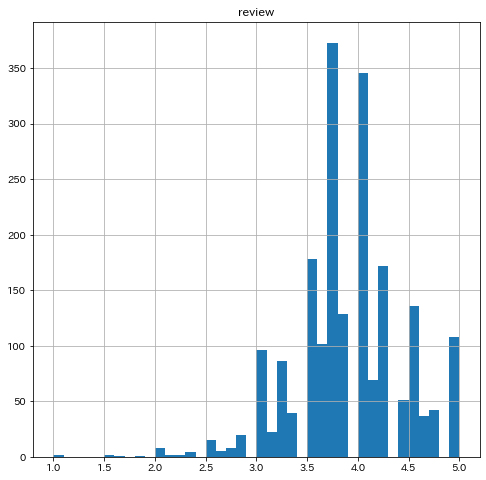

In [ ]:
mark_df.hist(bins=40, figsize=(8, 8))

# レビューDFの出力

In [ ]:
file_name_title = f'{tmdb_id}_{filmarks_id}'
mark_df.to_csv(f'./reviews_df/{file_name_title}_reviews.csv', index=False)

In [ ]:
review_id_df = pd.read_csv('./movies_df/reviews_id.csv')

if id_false:
  tmdb_id = -1
  filmarks_id = -1

add_col = {'NO.': [int(number)], 'title': [title], 'TMDb_ID': [int(tmdb_id)], 'Filmarks_ID': [int(filmarks_id)]}
add_review_id_df = pd.DataFrame(add_col)

new_review_id_df = pd.concat([review_id_df, add_review_id_df]).reset_index(drop=True)

new_review_id_df.tail()

,NO.,title,TMDb_ID,Filmarks_ID
39,39,アメリカン・ヒストリーX,73,17496
40,40,生きる,3782,8479
41,41,戦場のピアニスト,423,9783
42,42,街の灯,901,8965
43,43,裏窓,567,13436


In [ ]:
new_review_id_df.to_csv('./movies_df/reviews_id.csv', index=False)